# Bell-State Plot and Simulation

In this notebook, the code for plotting an easy bell state circuit and the simulation of exactly this is shown. The instructions therefore are derived from Qiskit's documentation, which can be found here:

https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

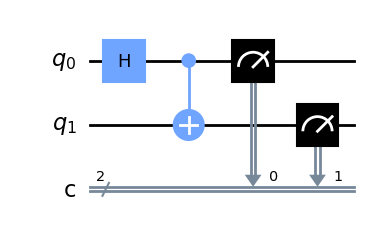

In [2]:
# Build a quantum circuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure(range(2), range(2))

measurements = QuantumCircuit(2, 2)
measurements.measure(range(2), range(2))

# Matplotlib Drawing
circuit.draw(output='mpl')



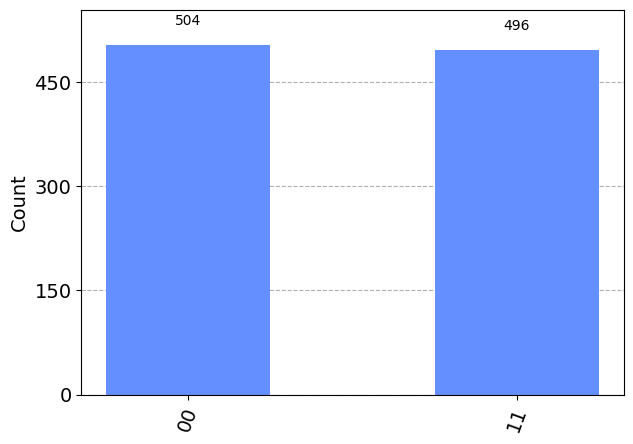

In [3]:
# Execute quantum circuit on a QasmSimulator. For more info on real QC execution, see below.
backend = BasicAer.get_backend('qasm_simulator') 
circ = circuit.compose(measurements)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
plot_histogram(counts)

In [4]:
# To let the bell state example be executed on a real quantum computer, accessible via your 
# personal IBM Quantum account (free to register), please use the following code:
'''
# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_circuit = transpile(circuit, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_circuit)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())
'''

# You can register for IBM Quantum on: https://quantum-computing.ibm.com/
# After registering, execute the code in the Quantum Lab creating a new lab file.
# Note that false results are measured too under real conditions on a noisy quantum computer.

"\n# 1. Create a simple quantum program called a 'quantum circuit'.\nfrom qiskit import QuantumCircuit\ncircuit = QuantumCircuit(2, 2)\ncircuit.h(0)\ncircuit.cx(0, 1)\ncircuit.measure_all()\n\n# 2. Ask IBM Quantum for its least busy device that isn't a simulator.\n#    If you're running this example locally, you need to load your\n#    account with your IBM Quantum API token\nfrom qiskit.providers.ibmq import IBMQ, least_busy\nprovider = IBMQ.get_provider('ibm-q')\ndevice = least_busy(\n            provider.backends(\n                filters= lambda x: not x.configuration().simulator\n            )\n        )\nprint(f'Running on {device.name()}')\n\n# 3. Convert the program to a form the device can run.\n#    This is known as 'transpiling'\nfrom qiskit import transpile\ntranspiled_circuit = transpile(circuit, device)\n\n# 4. Send the program off to IBM Quantum to run on a real device\n#    and monitor its status.\nfrom qiskit.tools import job_monitor\njob = device.run(transpiled_circui